# Question 1 - Unsupervised + Supervised Learning
## Anwaar Hadi
This notebook contains solutions to Question 1 of the coding challenge. The notebook depicts the process of implementing a k-means clustering methodology with a derived optimal number of clusters. Then, using cluster memberships as class labels, multinomial logistic regression and decission tree classifiers are trained and their performance is compared.

## Part i - Clustering using k-means

In [23]:
# import relevant libraries
import numpy as np
import pandas as pd
import csv
from sklearn import cluster

In [24]:
# load the data into a numpy array
data = None
with open('../quant_spec_coding/data/dataClustering.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
data = np.array(data, dtype=float)
data

array([[  5.64072013,   9.1801827 ,  10.28866117, ..., -10.19915415,
          0.36604256,   9.13270389],
       [  7.96213717,   4.39077939,   6.51351436, ...,  -7.50608486,
         -0.56584195,  10.02400647],
       [ -0.29981942,  -3.56693104,  -5.83650755, ...,  -4.21298313,
          6.04998347, -10.13094085],
       ...,
       [  1.69282663,  -3.22963292,  -5.8509819 , ...,  -0.8997377 ,
          5.13922675,  -9.51099456],
       [ -3.73420474,   5.84581368,  -0.04579228, ..., -10.8797207 ,
          6.34242545,  -3.86683827],
       [ -4.5212347 ,  -8.65186656,   3.79946441, ...,  10.85236389,
         -2.47187278,   2.87978098]])

Text(0, 0.5, 'Sum of Squared Error(inertia)')

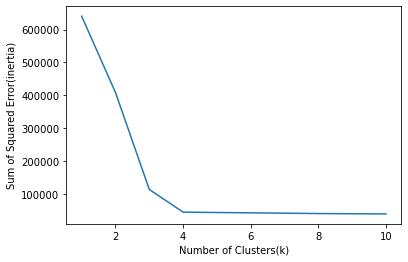

In [25]:
# Determine the optimal number of clusters for the data. Here, we'll use the "elbow" method, in which k-means
# clustering will be applied with varying numbers of clusters and the resulting Sum of Squared Errors(sum of 
# the distances between the samples and their closest centroids; also known as inertia) will be plotted against
# the number of clusters(k). The "elbow" of this plot(the point after which the graph starts becoming linear) will
# be the optimal number of clusters
import matplotlib.pyplot as plt
%matplotlib inline

num_clusters = [x for x in range(1, 11)]
SSE = []
for k in num_clusters:
    k_means = cluster.KMeans(n_clusters=k, n_init='auto')
    k_means.fit(data)
    SSE.append(k_means.inertia_)
plt.plot(num_clusters, SSE)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Squared Error(inertia)')

In [26]:
# As we can see from the plot above, the optimal number of clusters for this dataset is k=4. We can now apply
# k-means clustering with this hyperparameter
k_means = cluster.KMeans(n_clusters=4, n_init='auto')
k_means.fit(data)
labels = k_means.labels_
labels

array([2, 2, 1, ..., 1, 3, 0], dtype=int32)

Now that we have the clustering labels for the dataset, we can move on to training the classifiers

## Part ii - Classification using Multinomial Regression and Decision Tree

In [27]:
# Now we can build the Multinomial Regression model used as a benchmark for the classification. First, we will
# import the relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [28]:
# Next, we will perform a 70/30 train/test split on the data to ensure that we are avoiding overfitting. Here,
# 70% of the data will be used as a training set for the classifiers and 30% of the data will be used as a test
# set. This is done so as to mitigate overfitting of the classifiers with respect to the dataset.
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.7)
X_train

array([[ 2.91625894e+00, -4.48026951e+00, -6.28694880e+00, ...,
        -5.35625848e+00,  7.71281027e+00, -1.03954047e+01],
       [-2.09977243e+00, -7.39213942e+00,  4.29965203e+00, ...,
         9.06098163e+00, -1.31096463e+00,  3.53513878e+00],
       [-4.01627483e+00, -7.22514084e+00,  4.77030226e+00, ...,
         9.68112002e+00, -1.45242935e-03,  4.19796051e+00],
       ...,
       [ 5.00832678e+00,  5.12592133e+00,  6.52861435e+00, ...,
        -8.83517079e+00, -3.33095380e+00,  1.05011426e+01],
       [ 3.95392572e+00, -2.87808246e+00, -3.78582699e+00, ...,
        -1.94458082e+00,  5.68523661e+00, -6.14276755e+00],
       [-5.17958257e+00, -3.80412610e+00,  1.53115206e+00, ...,
         7.88405028e+00, -1.50546558e+00,  1.61633296e+00]])

In [29]:
# Fit Multinomial regression model using data and class labels from the training set
mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty=None).fit(X_train, y_train)

In [30]:
# Print information about the regression, including coefficients, class info, intercepts, and number of features seen
print("Classes:", mlr.classes_)
print("-"*40)
print("Coefficients:", mlr.coef_)
print("-"*40)
print("Intercepts:", mlr.intercept_)
print("-"*40)
print("Number of features seen:", mlr.n_features_in_)

Classes: [0 1 2 3]
----------------------------------------
Coefficients: [[-0.21565542 -0.69572559  0.18501435 -0.37745577  1.23160198  0.59135914
   0.22082503  0.36675325]
 [ 1.24463288 -0.41036816 -1.08431134 -0.84602469  0.7239436  -0.1790783
  -0.46266987 -1.19071726]
 [ 0.2557935   0.16485162  0.43196583  0.38590336  0.47656803 -0.4868148
  -0.10510012  0.62913419]
 [-1.28477096  0.94124212  0.46733116  0.83757709 -2.43211362  0.07453396
   0.34694496  0.19482982]]
----------------------------------------
Intercepts: [ 0.2754499  -0.16414402  0.1038705  -0.21517637]
----------------------------------------
Number of features seen: 8


In [31]:
# Predict and compute classification scores and confusion matrix for the Multinomial regression
y_pred = mlr.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix for Multinomial:\n", confusion)
print("-"*40)
print("Report for Multinomial:\n", report)

Confusion Matrix for Multinomial:
 [[205   0   0   0]
 [  0 197   0   0]
 [  0   0 159   0]
 [  0   0   0 189]]
----------------------------------------
Report for Multinomial:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       197
           2       1.00      1.00      1.00       159
           3       1.00      1.00      1.00       189

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [32]:
# Build Decision Tree classifier for comparison
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_tree = t.predict(X_test)
confusion_tree = confusion_matrix(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)
print("Confusion Matrix for Tree:\n", confusion_tree)
print("-"*40)
print("Report for Tree:\n", report_tree)

Confusion Matrix for Tree:
 [[205   0   0   0]
 [  0 196   0   1]
 [  0   0 159   0]
 [  0   0   1 188]]
----------------------------------------
Report for Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      0.99      1.00       197
           2       0.99      1.00      1.00       159
           3       0.99      0.99      0.99       189

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



[Text(0.5, 0.875, 'x[7] <= -1.127\ngini = 0.75\nsamples = 1750\nvalue = [420, 428, 466, 436]\nclass = 2'),
 Text(0.25, 0.625, 'x[4] <= -4.796\ngini = 0.5\nsamples = 864\nvalue = [0, 428, 0, 436]\nclass = 3'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 435\nvalue = [0, 0, 0, 435]\nclass = 3'),
 Text(0.375, 0.375, 'x[1] <= 3.117\ngini = 0.005\nsamples = 429\nvalue = [0, 428, 0, 1]\nclass = 1'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 428\nvalue = [0, 428, 0, 0]\nclass = 1'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]\nclass = 3'),
 Text(0.75, 0.625, 'x[1] <= -1.52\ngini = 0.499\nsamples = 886\nvalue = [420, 0, 466, 0]\nclass = 2'),
 Text(0.625, 0.375, 'gini = 0.0\nsamples = 420\nvalue = [420, 0, 0, 0]\nclass = 0'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 466\nvalue = [0, 0, 466, 0]\nclass = 2')]

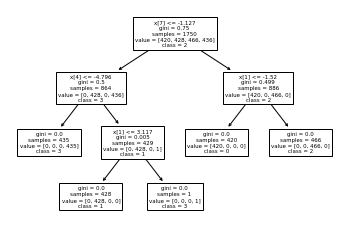

In [41]:
# Visualize the tree
from sklearn.tree import plot_tree
plot_tree(t, class_names=["0", "1", "2", "3"])

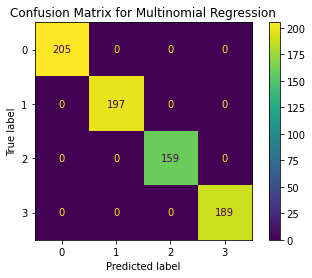

In [43]:
# Visualize confusion matrix for Multinomial Logistic Regression
from sklearn.metrics import ConfusionMatrixDisplay
disp_multi = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=["0",  "1", "2", "3"])
disp_multi.plot()
plt.title("Confusion Matrix for Multinomial Regression")
plt.show()

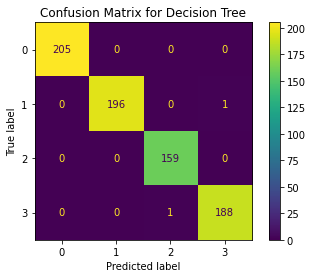

In [45]:
# Visualize confusion matrix for Decision Tree
disp_tree = ConfusionMatrixDisplay(confusion_matrix=confusion_tree, display_labels=["0",  "1", "2", "3"])
disp_tree.plot()
plt.title("Confusion Matrix for Decision Tree")
plt.show()

From the above tests, it is notable that multinomial regression performs slightly better than decision trees, since multinomial regression is able to predict the target class with a slightly higher degree of accuracy (although decision trees are not far off in this respect). One potential reason for this may be the nature of the dataset. Since the features in the dataset are continuous, the decision tree would need to discretize the data before constructing the tree, which may lead to dome discrepancies. However, the multinomial regression model relies on generating a continuous valued function (softmax function) for predicting class values, which would result in a higher degree of accuracy given the dataset